<a href="https://colab.research.google.com/github/JoanYego/Financial-Inclusion-in-East-Africa/blob/master/Financial_Inclusion_in_East_Africa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Specifying the Research Questions


> The aim of this analysis is to come up with a model that can predict which individuals are most likely to have or use a bank account.


# Defining the Metric for Success

> This reserch project will be considered successful when we are able to predict the individuals that most likely have or use a commercial bank account for personal or business purposes.

# Understanding the Research Context

> Financial inclusion means individuals and businesses are able to access useful financial products and services that serves their specific needs. For instance, taking a bank loan to start a business that will allow one to generate income and ultimately improve their standard of living. One of the main challenges of economic and human development in Africa is lack of financial inclusion.

> Access to banks is a huge indicator of financial inclusion. Commercial banks allow individuals and business to not only save and make payments efficiently but also build up their credit worthiness (through borrowing and repaying accordingly) which can improve their access to financial instruments and services. In Kenya, uganda, Tanzania and Rwanda only 13.9% of the adult population have or use bank accounts. This implies that a majority of the population does not have access to a lot of financial services which can greatly impact their financial outcomes. 

>Being able to predict which individuals are most likely to have a bank accounts will allow for an efficient way to reach those whose are cut off from the financial ecosystem.

# Experimental Design

> Below are the steps that will be conducted in this analysis in order to answer the research question as accurately and comprehensively as possible:


>*   Load data and preview preliminary characteristics of the dataset
>*   Data Cleaning (check for and deal with outliers, anomalies and missing data)
>*   Univariate Analysis
>*   Bivariate Analysis
>*   Multivariate Analysis
>*   Implementing the Solution
>*   Challenging the Solution and Follow Up Questions



# Data Relevance

> The dataset used in the analysis contains records of individuals from four Eastern Africa countries i.e.Kenya, Uganda, Tanzania and Rwanda between 2016 and 2018. Some of the information in the dataset include gender, occupation, age and marital status of the individual and whether the individual had a bank account at the time the data was collected. The data was sourced from various Finscope surveys that are available online.

> The data available for this analysis is valid and useful towards answering the reseach question since it will allow us to identify some of the key demographic factors and characteristics of persons likely to have a bank account.

# Reading the Data

In [ ]:
# Importing relevant python libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Loading the data from the source (csv file)

#Dataset Url: http://bit.ly/FinancialDataset

finance = pd.read_csv('http://bit.ly/FinancialDataset')
finance

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


# Checking the Data

In [ ]:
# Previewing the top of the dataset

finance.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
# Previewing the bottom of the dataset

finance.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [ ]:
# Previewing a sample of the dataset

finance.sample(n=4)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
16887,Tanzania,2017,uniqueid_2085,No,Urban,No,2.0,30.0,Female,Spouse,Single/Never Married,Primary education,Remittance Dependent
4331,Kenya,2018,uniqueid_4332,Yes,Urban,Yes,3.0,27.0,Female,Spouse,Married/Living together,Secondary education,Self employed
4287,Kenya,2018,uniqueid_4288,No,Urban,No,4.0,41.0,Male,Head of Household,Married/Living together,Secondary education,Self employed
12211,Rwanda,2016,uniqueid_6144,No,Rural,Yes,6.0,51.0,Male,Head of Household,Married/Living together,Secondary education,Self employed


In [ ]:
# Determining the number of records in the dataset

finance.shape

(23524, 13)

In [ ]:
# Checking whether each column has an appropriate datatype

finance.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [ ]:
# Checking the number of unique records in each column

finance.nunique()

country                      4
year                         6
uniqueid                  8735
Has a Bank account           2
Type of Location             2
Cell Phone Access            2
household_size              21
Respondent Age              85
gender_of_respondent         2
The relathip with head       6
marital_status               5
Level of Educuation          7
Type of Job                 10
dtype: int64

In [ ]:
# Previewing existence of null values

finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [ ]:
# Summary statistics

finance.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


# External Data Source Validation

# Data Cleaning

In [ ]:
# Preliminary Data Cleaning Steps

# Renaming columns for uniformity

finance.columns = ['country', 'year', 'uniqueid', 'has_a_bank_account', 'location_type', 
                   'has_a_cell_phone', 'household_size', 'respondent_age', 'respondent_gender',
                   'relationship_with_head', 'marital_status', 'education_level', 'occupation']
finance.head()

,country,year,uniqueid,has_a_bank_account,location_type,has_a_cell_phone,household_size,respondent_age,respondent_gender,relationship_with_head,marital_status,education_level,occupation
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
# Checking whether there are any duplicate values

finance.duplicated().any()

False

## Outliers

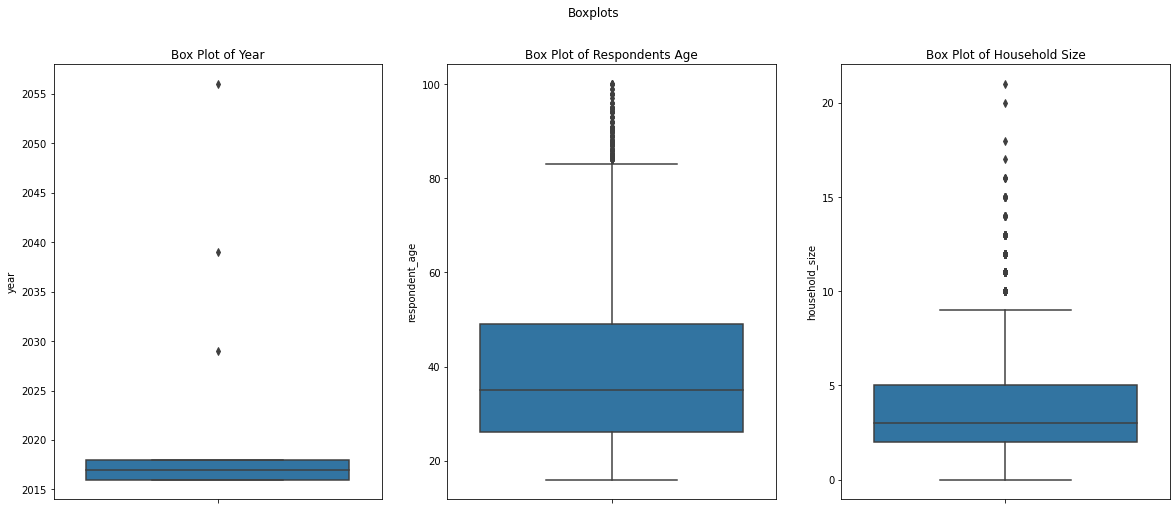

In [ ]:
# Checking for Outliers

fig, ax = plt.subplots(1,3, figsize=(20,8))
fig.suptitle('Boxplots')
sns.boxplot(data=finance, y = "year", ax=ax[0])
ax[0].set_title('Box Plot of Year')
sns.boxplot(data=finance, y = "respondent_age", ax=ax[1])
ax[1].set_title('Box Plot of Respondents Age')
sns.boxplot(data=finance, y = "household_size", ax=ax[2])
ax[2].set_title('Box Plot of Household Size')

plt.show()

# The plots below show that we have three outliers in the 'year' variable,
# eleven outliers in 'household size' variable and multiple outliers in the 'age' variable.

In [ ]:
# We can identify the exact outliers in the 'respondent age'
# attributes with the function below

outliers = []

def detect_outlier(data):
  threshold=3
  mean_1=np.mean(data)
  std_1=np.std(data)

  for y in data:
    z_score=(y-mean_1)/std_1
    if np.abs(z_score)>threshold:
      outliers.append(y)
  return outliers
detect_outlier(finance['respondent_age'])

# We can see that ages 89 - 100 are outliers.
# These are all plausible ages

[95.0,
 95.0,
 95.0,
 93.0,
 90.0,
 89.0,
 95.0,
 94.0,
 95.0,
 93.0,
 90.0,
 92.0,
 92.0,
 90.0,
 90.0,
 90.0,
 91.0,
 93.0,
 95.0,
 90.0,
 89.0,
 89.0,
 95.0,
 90.0,
 89.0,
 89.0,
 89.0,
 90.0,
 95.0,
 93.0,
 92.0,
 95.0,
 94.0,
 92.0,
 95.0,
 90.0,
 95.0,
 95.0,
 89.0,
 95.0,
 98.0,
 95.0,
 97.0,
 92.0,
 89.0,
 92.0,
 89.0,
 96.0,
 89.0,
 99.0,
 89.0,
 94.0,
 91.0,
 91.0,
 90.0,
 89.0,
 89.0,
 90.0,
 95.0,
 89.0,
 90.0,
 96.0,
 100.0,
 90.0,
 90.0,
 89.0,
 98.0,
 91.0,
 92.0,
 95.0,
 89.0,
 94.0,
 99.0,
 90.0,
 90.0,
 90.0,
 90.0,
 90.0,
 100.0,
 95.0,
 91.0,
 90.0,
 95.0,
 94.0,
 90.0,
 98.0,
 98.0,
 100.0,
 100.0,
 90.0,
 90.0,
 100.0,
 90.0,
 90.0,
 96.0,
 90.0,
 90.0,
 98.0,
 95.0,
 98.0,
 90.0]

## Anomalies

In [ ]:
# Checking for Anomalies
# 'year' variable

q1_year = finance['year'].quantile(.25)
q3_year = finance['year'].quantile(.75)

iqr_year = q3_year - q1_year

# 'respondent_age' variable
q1_age = finance['respondent_age'].quantile(.25)
q3_age = finance['respondent_age'].quantile(.75)

iqr_age = q3_age - q1_age

# 'household_size' variable
q1_size = finance['household_size'].quantile(.25)
q3_size = finance['household_size'].quantile(.75)

iqr_size = q3_size - q1_size

print(iqr_year, iqr_age, iqr_size) 

# The results show that 'year' has 2 records that are not within the middle 50% of the records in that column
# Similarly, 'respondent age' and 'household size' variables have 23 and 3 (respectively)
# records that do not lie within the upper and lower bounds


2.0 23.0 3.0


## Missing Data

In [ ]:
# Checking whether we have any missing data in the dataframe


np.count_nonzero(finance.isnull())
finance.isnull().sum()

# we can see for the result below that there is missing data

country                   14
year                       0
uniqueid                   0
has_a_bank_account        36
location_type             15
has_a_cell_phone          11
household_size            28
respondent_age            34
respondent_gender         34
relationship_with_head     4
marital_status            32
education_level           29
occupation                30
dtype: int64

In [ ]:
# Dealing with missing data
# We can check what the data looks like for the records where 
# 'country' variable is null

finance[finance['country'].isna()]

# We can see that the 'year' variable is 2017. From the data source,
# we know that the records taken in 2017 are for Tanzania only
# so we can replace the country variable from Null to Tanzania

finance["country"].fillna("Tanzania", inplace = True)

In [ ]:
# Verifying that the 'country' variable no longer has null values
finance.isnull().sum()

country                    0
year                       0
uniqueid                   0
has_a_bank_account        36
location_type             15
has_a_cell_phone          11
household_size            28
respondent_age            34
respondent_gender         34
relationship_with_head     4
marital_status            32
education_level           29
occupation                30
dtype: int64

In [ ]:
# The remaining dataset has mainly categorical type of data
# which is not necessarily easy to deduce from other values
# In this case, we can drop all remaining null values

finance.dropna(inplace=True)
finance.reset_index(drop=True, inplace=True)
finance

,country,year,uniqueid,has_a_bank_account,location_type,has_a_cell_phone,household_size,respondent_age,respondent_gender,relationship_with_head,marital_status,education_level,occupation
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23352,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23353,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23354,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23355,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [ ]:
# Confirming that there are no nulls anymore after the drop

finance.isnull().sum()

country                   0
year                      0
uniqueid                  0
has_a_bank_account        0
location_type             0
has_a_cell_phone          0
household_size            0
respondent_age            0
respondent_gender         0
relationship_with_head    0
marital_status            0
education_level           0
occupation                0
dtype: int64

# Exploratory Analysis

## Univariate Analysis

### Visualizations

In [ ]:
# Ploting the univariate summaries and recording our observations

# We can create a frequency table
# to show how many times each level of education exists in the dataset

finance.education_level.value_counts()

Primary education                  12694
No formal education                 4474
Secondary education                 4209
Tertiary education                  1144
Vocational/Specialised training      801
6                                     27
Other/Dont know/RTA                    8
Name: education_level, dtype: int64

In [ ]:
# We can also check the frequency table of 'country' variable
# to each the number of records by country

finance.country.value_counts()

Rwanda      8684
Tanzania    6514
Kenya       6064
Uganda      2095
Name: country, dtype: int64

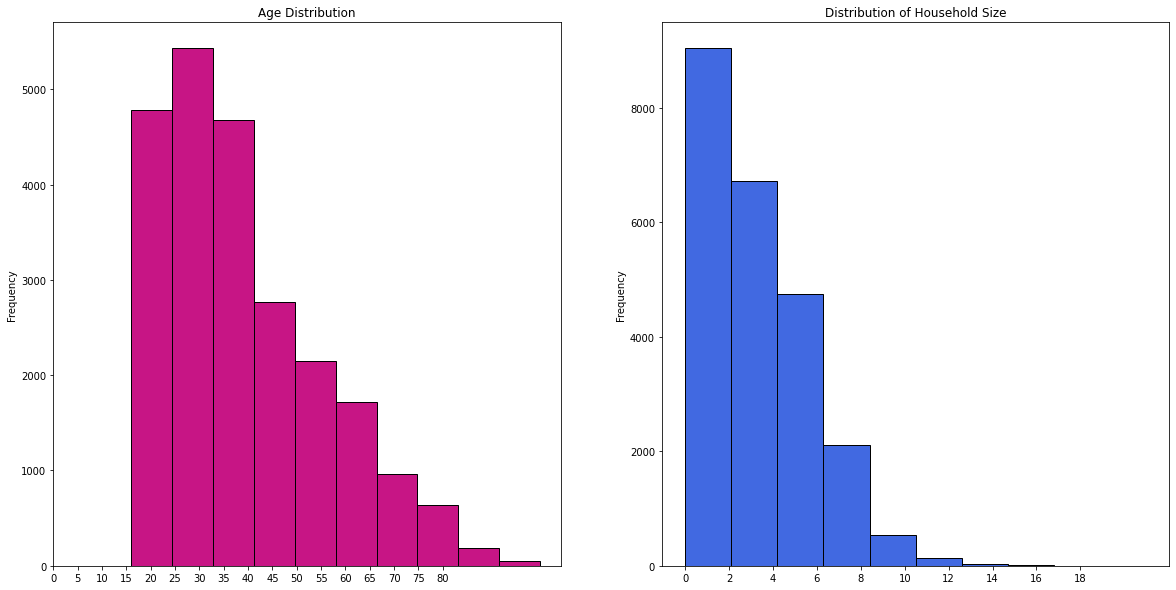

In [ ]:
# Next, we can plot a histogram to show the distribution of 
# age and household size in the dataset
fig,ax=plt.subplots(1,2,figsize=(20,10))
finance['respondent_age'].plot.hist(ax=ax[0],bins=10,edgecolor='black',color='mediumvioletred')
ax[0].set_title('Age Distribution')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
finance['household_size'].plot.hist(ax=ax[1],color='royalblue',bins=10,edgecolor='black')
ax[1].set_title('Distribution of Household Size')
x2=list(range(0,20,2))
ax[1].set_xticks(x2)
plt.show()

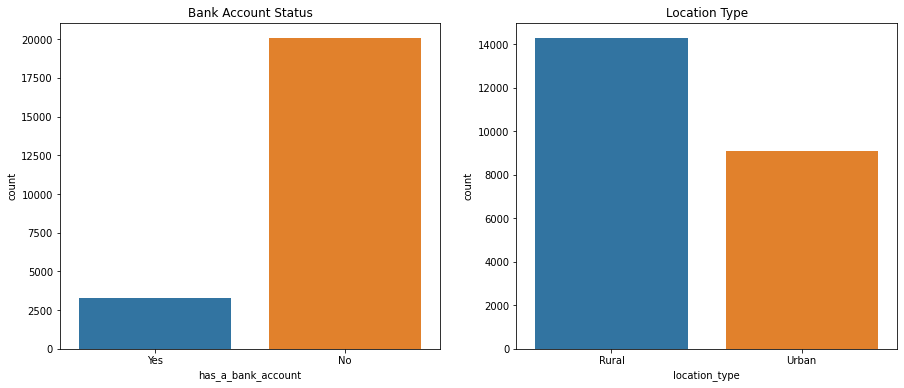

In [ ]:
# We can plot various bar charts
# to help visualize other statistics

fig,ax=plt.subplots(1,2,figsize=(15,6))
sns.countplot('has_a_bank_account',data=finance,ax=ax[0])
ax[0].set_title('Bank Account Status')
sns.countplot('location_type',data=finance,ax=ax[1])
ax[1].set_title('Location Type')

plt.show()

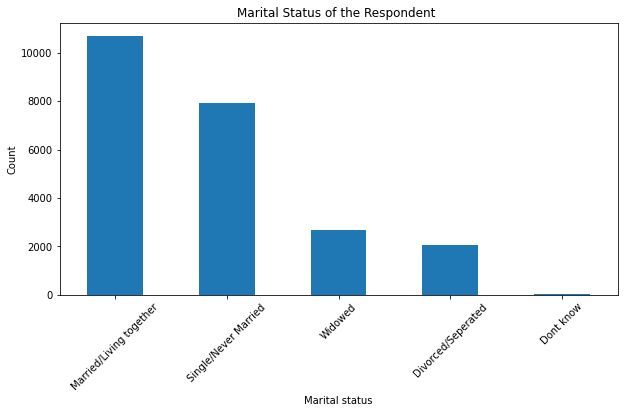

In [ ]:
# Bar chart for 'marital status' variable

finance['marital_status'].value_counts().plot.bar(rot =0,figsize=(10,5))
plt.xlabel("Marital status")
plt.ylabel("Count")
plt.title("Marital Status of the Respondent ")
plt.xticks(rotation = 45)
plt.show()

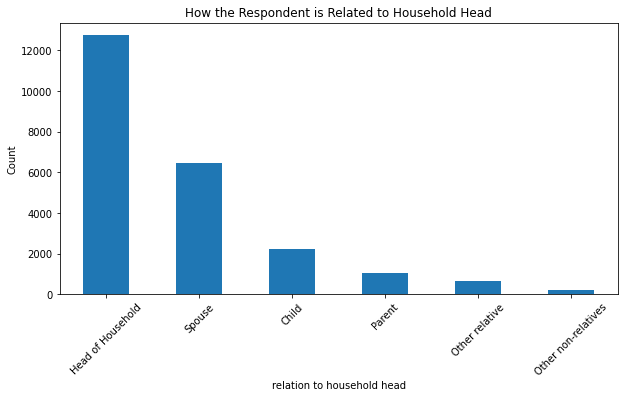

In [ ]:
# Bar chart for 'relation to household head' variable

finance['relationship_with_head'].value_counts().plot.bar(rot =0,figsize=(10,5))
plt.xlabel("relation to household head")
plt.ylabel("Count")
plt.title("How the Respondent is Related to Household Head")
plt.xticks(rotation = 45)
plt.show()

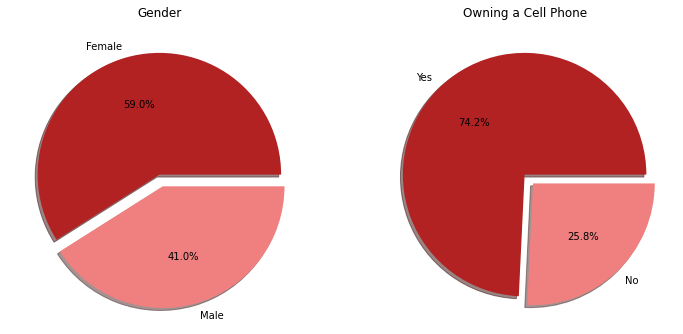

In [ ]:
# Pie chart showing percentage distribution of gender variable
# and 'has_cell_phone' variable

fig,ax=plt.subplots(1,2,figsize=(12,6))
colors = ['firebrick', 'lightcoral']
finance['respondent_gender'].value_counts().plot.pie(explode=[0,0.1],colors=colors, autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Gender')
ax[0].set_ylabel('')
finance['has_a_cell_phone'].value_counts().plot.pie(explode=[0,0.1],colors=colors, autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[1].set_title('Owning a Cell Phone')
ax[1].set_ylabel('')
plt.show()

### Measures of Central Tendency

In [ ]:
# We can check the mean, mode and median of ages in the dataset
mean_age = finance['respondent_age'].mean()
median_age = finance['respondent_age'].median()
mode_age = finance['respondent_age'].mode()
print(mean_age, median_age, mode_age)

# We can see that the mean age is 38, median age is 35 and mode age is 30

38.80532602645888 35.0 0    30.0
dtype: float64


In [ ]:
# Checking the mean, mode and median of hosehold sizes in the dataset
mean_hsize = finance['household_size'].mean()
median_hsize = finance['household_size'].median()
mode_hsize = finance['household_size'].mode()
print(mean_hsize, median_hsize, mode_hsize)

# The mean, median and mode of household size variable are 3, 3 and 2 respectively

3.687588303292375 3.0 0    2.0
dtype: float64


### Measures of Dispersion

In [ ]:
# Checking the various measures of dispersion for the age variable
# standard deviation, variance, range, interquatile range, skewness and kurtosis

age_std = finance['respondent_age'].std()
age_var = finance['respondent_age'].var()

age_max = finance['respondent_age'].max()
age_min = finance['respondent_age'].min()
age_range = age_max - age_min

age_skew = finance['respondent_age'].skew()
age_kurt = finance['respondent_age'].kurt()

print('Standard Deviation of Age variable is ' + str(age_std))
print('Variance of Age variable is ' + str(age_var))
print('Range of Age variable is ' + str(age_range))
print('Skewness of Age variable is ' + str(age_skew))
print('Kurtosis of Age variable is ' + str(age_kurt))


Standard Deviation of Age variable is 16.521527131910133
Variance of Age variable is 272.96085877044266
Range of Age variable is 84.0
Skewness of Age variable is 0.8403528775777741
Kurtosis of Age variable is 0.09719678738690396


In [ ]:
# Summary of above statistics for age attribute

finance['respondent_age'].describe()

count    23357.000000
mean        38.805326
std         16.521527
min         16.000000
25%         26.000000
50%         35.000000
75%         49.000000
max        100.000000
Name: respondent_age, dtype: float64

In [ ]:
# Checking the various measures of dispersion for the household size variable
# standard deviation, variance, range, interquatile range, skewness and kurtosis

hsize_std = finance['household_size'].std()
hsize_var = finance['household_size'].var()

hsize_max = finance['household_size'].max()
hsize_min = finance['household_size'].min()
hsize_range = hsize_max - hsize_min

hsize_skew = finance['household_size'].skew()
hsize_kurt = finance['household_size'].kurt()

print('Standard Deviation of Household Size variable is ' + str(hsize_std))
print('Variance of Household Size variable is ' + str(hsize_var))
print('Range of Household Size variable is ' + str(hsize_range))
print('Skewness of Household Size variable is ' + str(hsize_skew))
print('Kurtosis of Household Size variable is ' + str(hsize_kurt))

Standard Deviation of Household Size variable is 2.2809903775845206
Variance of Household Size variable is 5.202917102633174
Range of Household Size variable is 21.0
Skewness of Household Size variable is 0.9747175002958918
Kurtosis of Household Size variable is 1.1550663154603718


In [ ]:
# Summary of above statistics for household size attribute

finance['household_size'].describe()

count    23357.000000
mean         3.687588
std          2.280990
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         21.000000
Name: household_size, dtype: float64

## Bivariate Analysis

> In this analysis, we will check the relationship between bank account status and other variables. For instance, we need to ascertain whether females are likely to have bank accounts as opposed to males or whether individuals in urban areas are more likely to use commercial banks compared to those in rural areas. This way, we can begin to profile characteristics unique to persons likely to have bank accounts.

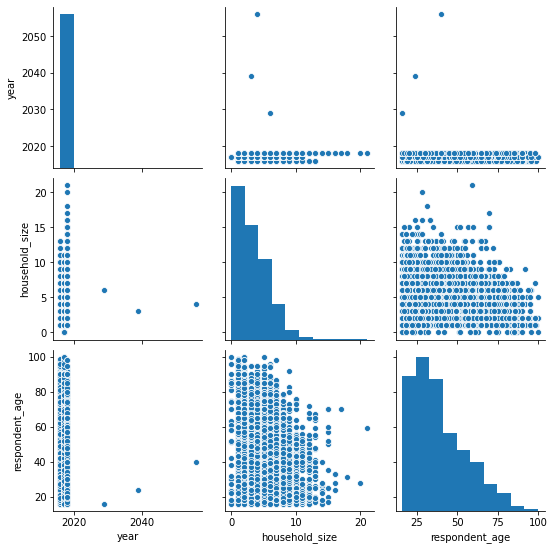

In [ ]:
# Ploting the bivariate summaries and recording our observations

sns.pairplot(finance)
plt.show()

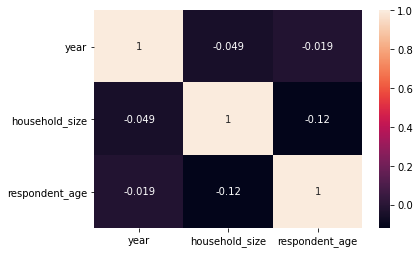

In [ ]:
# Plotting the Pearson correlation coefficient among numeric variables
# We can see that the three varibles below are not correlated
# since the correlation coefficients are close to 0

sns.heatmap(finance.corr(),annot=True)
plt.show()

Text(9.925000000000004, 0.5, 'Household Size')

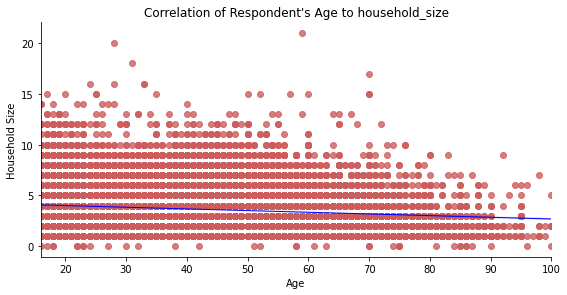

In [ ]:
sns.lmplot('respondent_age', "household_size", finance, scatter_kws={'marker':'o', 'color': 'indianred'}, 
           line_kws={'linewidth':1,'color':'blue'}, height = 4, aspect = 2)

plt.title("Correlation of Respondent's Age to household_size")
plt.xlabel('Age')
plt.ylabel("Household Size")

In [ ]:
# We can compare various categorical variables with each other
# To begin we can check how many individuals have bank accounts, based
# on their gender and type of location

pd.crosstab([finance.respondent_gender,finance.has_a_bank_account]
            ,finance.location_type,margins=True).style.background_gradient(cmap='Pastel1_r')

# We see that generally, more men have bank accounts compared to women
# For females, people who live in urban areas are more likely to have
# bank accounts relative to those who live in rural areas. The opposite is true for males

In [ ]:
# We can also check how many individuals have bank accounts, based
# on their marital status and also their phone ownership status

pd.crosstab([finance.has_a_cell_phone,finance.has_a_bank_account]
            ,finance.marital_status,margins=True).style.background_gradient(cmap='Pastel1_r')

# We see that generally, individuals who have cell phones are likely to have have bank accounts compared 
# to those who don't have cell phones.


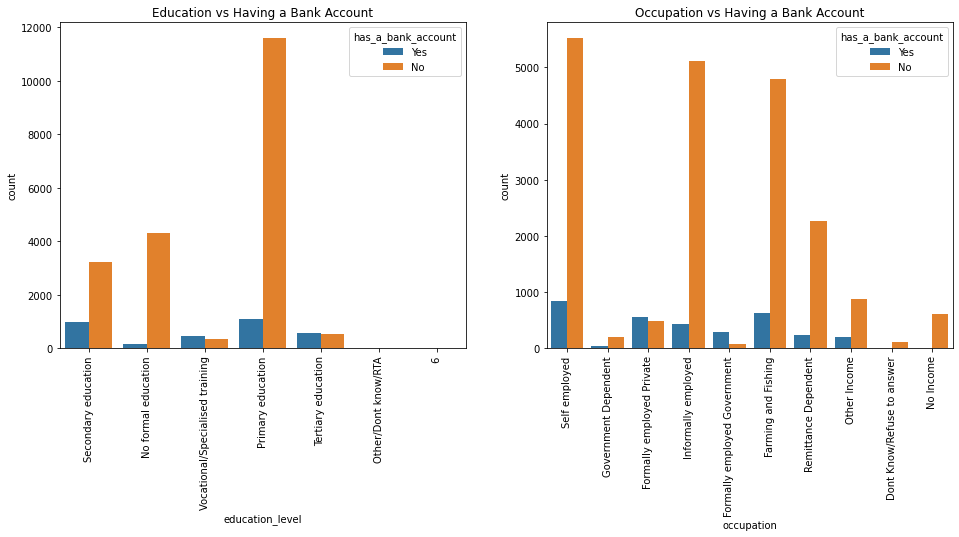

In [ ]:
# Comparing education level and occupation vs having a bank account


fig,ax=plt.subplots(1,2,figsize=(16,6))

sns.countplot('education_level',hue='has_a_bank_account',data=finance,ax=ax[0])
ax[0].set_title('Education vs Having a Bank Account')


sns.countplot('occupation',hue='has_a_bank_account',data=finance,ax=ax[1])
ax[1].set_title('Occupation vs Having a Bank Account')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)


plt.show()

In [ ]:
# We need to change some categorical attributes to numeric
# so that we can get a summary of all correlations
# to whether a person has a bank account or not

encode = {"has_a_bank_account": {"Yes":1, "No":0}, "respondent_gender": {"Male":1, "Female":0},
          "has_a_cell_phone":{"Yes":1,"No":0}, "location_type": {"Rural":1, "Urban":0},
          "education_level":{"No formal education":0,"Primary education":1, "Secondary education":2,
                              "Vocational/Specialised training":3,"Tertiary education":4, "Other/Dont know/RTA":5},
          "relationship_with_head":{"Head of Household":0, "Child":1, "Parent":2,
                            "Spouse":3, "Other relative":4, "Other non-relatives":5}, 
          "marital_status":{"Married/Living together":0, "Single/Never Married":1, "Divorced/Seperated":2,
                            "Widowed":3, "Dont know":4}}


In [ ]:
finance.replace(encode, inplace = True)
finance.head()

,country,year,uniqueid,has_a_bank_account,location_type,has_a_cell_phone,household_size,respondent_age,respondent_gender,relationship_with_head,marital_status,education_level,occupation
0,Kenya,2018,uniqueid_1,1,1,1,3.0,24.0,0,3,0,2,Self employed
1,Kenya,2018,uniqueid_2,0,1,0,5.0,70.0,0,0,3,0,Government Dependent
2,Kenya,2018,uniqueid_3,1,0,1,5.0,26.0,1,4,1,3,Self employed
3,Kenya,2018,uniqueid_4,0,1,1,5.0,34.0,0,0,0,1,Formally employed Private
4,Kenya,2018,uniqueid_5,0,0,0,8.0,26.0,1,1,1,1,Informally employed


In [ ]:
# Summary of correlations between various demographic info
# with bank account status

finance['location_type'].corr(finance['has_a_bank_account'])


-0.08849280626186377

In [ ]:
finance['has_a_cell_phone'].corr(finance['has_a_bank_account'])

0.20957156872677984

In [ ]:
finance['household_size'].corr(finance['has_a_bank_account'])

-0.022856244820033532

In [ ]:
finance['respondent_gender'].corr(finance['has_a_bank_account'])

0.11617726823081483

## Multivariate Analysis

> Here, we are going to use Principal Component Analysis (PCA) to select the most important features in the dataset that tell us the maximum amount of information about the dataset


In [ ]:
finance.head()

,country,year,uniqueid,has_a_bank_account,location_type,has_a_cell_phone,household_size,respondent_age,respondent_gender,relationship_with_head,marital_status,education_level,occupation
0,Kenya,2018,uniqueid_1,1,1,1,3.0,24.0,0,3,0,2,Self employed
1,Kenya,2018,uniqueid_2,0,1,0,5.0,70.0,0,0,3,0,Government Dependent
2,Kenya,2018,uniqueid_3,1,0,1,5.0,26.0,1,4,1,3,Self employed
3,Kenya,2018,uniqueid_4,0,1,1,5.0,34.0,0,0,0,1,Formally employed Private
4,Kenya,2018,uniqueid_5,0,0,0,8.0,26.0,1,1,1,1,Informally employed


In [ ]:
finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23357 entries, 0 to 23356
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23357 non-null  object 
 1   year                    23357 non-null  int64  
 2   uniqueid                23357 non-null  object 
 3   has_a_bank_account      23357 non-null  int64  
 4   location_type           23357 non-null  int64  
 5   has_a_cell_phone        23357 non-null  int64  
 6   household_size          23357 non-null  float64
 7   respondent_age          23357 non-null  float64
 8   respondent_gender       23357 non-null  int64  
 9   relationship_with_head  23357 non-null  int64  
 10  marital_status          23357 non-null  int64  
 11  education_level         23357 non-null  object 
 12  occupation              23357 non-null  object 
dtypes: float64(2), int64(7), object(4)
memory usage: 2.3+ MB


In [ ]:
# Updating data types accordingly

finance['education_level'] = finance['education_level'].astype(str).astype(int)
finance['relationship_with_head'] = finance['relationship_with_head'].astype(str).astype(int)
finance['marital_status'] = finance['marital_status'].astype(str).astype(int)

In [ ]:
finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23357 entries, 0 to 23356
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23357 non-null  object 
 1   year                    23357 non-null  int64  
 2   uniqueid                23357 non-null  object 
 3   has_a_bank_account      23357 non-null  int64  
 4   location_type           23357 non-null  int64  
 5   has_a_cell_phone        23357 non-null  int64  
 6   household_size          23357 non-null  float64
 7   respondent_age          23357 non-null  float64
 8   respondent_gender       23357 non-null  int64  
 9   relationship_with_head  23357 non-null  int64  
 10  marital_status          23357 non-null  int64  
 11  education_level         23357 non-null  int64  
 12  occupation              23357 non-null  object 
dtypes: float64(2), int64(8), object(3)
memory usage: 2.3+ MB


In [ ]:
# Dropping unncessary columns

finance.drop(['country','year','uniqueid','occupation'],axis=1,inplace=True)

In [ ]:
finance.head()

,has_a_bank_account,location_type,has_a_cell_phone,household_size,respondent_age,respondent_gender,relationship_with_head,marital_status,education_level
0,1,1,1,3.0,24.0,0,3,0,2
1,0,1,0,5.0,70.0,0,0,3,0
2,1,0,1,5.0,26.0,1,4,1,3
3,0,1,1,5.0,34.0,0,0,0,1
4,0,0,0,8.0,26.0,1,1,1,1


### Principal Component Analysis (PCA)

In [ ]:
# Preprocessing

# The first preprocessing step is to divide the dataset into a feature set and corresponding labels. 
# We can store the feature sets into the X variable 
# and the series of corresponding labels in to the y variable

x = finance.drop('has_a_bank_account',1)
y = finance['has_a_bank_account']


In [ ]:
# Checking the x variable

x.shape


(23357, 8)

In [ ]:
# Checking the y variable

y.shape


(23357,)

In [ ]:
# Splitting the dataset into the Training set and Test set
# we shall define the size of the test data as 20% of entire dataset

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
# Normalization
 
# We will perform standard scalar normalization to normalize our feature set

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [ ]:
# Applying PCA

# We expect return all the features in the feature set for both the training and test sets
# since we will not specify the number of components in the constructor

from sklearn.decomposition import PCA

pca = PCA()
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [ ]:
# Explained Variance Ratio

# we need to check the variance caused by each of the principal components using
# the explained variance ratio

explained_variance = pca.explained_variance_ratio_
explained_variance

# The result below shows that the first principal component is responsible for 22.96% variance. 
# Similarly, the second principal component causes 18.89% variance in the dataset. 
# Collectively we can say that (22.96 + 18.89) 41.85% of the classification information contained 
# in the feature set is captured by the first two principal components.


array([0.22964966, 0.18891222, 0.17105915, 0.11589348, 0.09358427,
       0.08020505, 0.07266411, 0.04803206])

In [ ]:
# Using 1 Principal Component to train algorithm

from sklearn.decomposition import PCA

pca = PCA(n_components=1)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [ ]:
# Training and Making Predictions using random forest classification

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)

In [ ]:
# Performance Evaluation

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

# with only one feature, the random forest algorithm is able to correctly predict an 85.68% accuracy.

[[4003    0]
 [ 669    0]]
Accuracy 0.856806506849315


In [ ]:
# Using 2 Principal Components to train algorithm
# and make predictions using random forest classification

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

pca = PCA(n_components=2)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(x_train, y_train)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

# with two features, the random forest algorithm is able to correctly predict an 85.68% accuracy.

[[4003    0]
 [ 669    0]]
Accuracy 0.856806506849315


In [ ]:
# Using 3 Principal Components to train algorithm
# and make predictions using random forest classification

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

pca = PCA(n_components=3)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(x_train, y_train)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

# with three features, the random forest algorithm is able to correctly predict an 85.68% accuracy.

[[4003    0]
 [ 669    0]]
Accuracy 0.856806506849315


### Factor Analysis

In [ ]:
# First we need to evaluate the “factorability” of our dataset
# If Bartlett’s test turns out to be statistically insignificant, then we cannot use a factor analysis.

!pip install factor_analyzer==0.2.3

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity


(27196.413084996748, 0.0)

In [ ]:
chi_square_value,p_value=calculate_bartlett_sphericity(finance)
chi_square_value, p_value

# In Bartlett ’s test, the p-value is 0. The test was statistically insignificant, 
# indicating that the observed correlation matrix is not an identity matrix.

(27196.413084996748, 0.0)

In [ ]:
# Next we can check the Kaiser-Meyer-Olkin (KMO) Test
# to determine the adequacy for each observed variable and for the complete model.

from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(finance)

kmo_model


# The overall KMO for our data is 0.54, which is considered inadequate
# This value indicates that we cannot proceed with the planned factor analysis

0.5366573084407769

In [ ]:
kmo_all

,KMO
has_a_bank_account,0.558779
location_type,0.554620
has_a_cell_phone,0.683453
household_size,0.626153
respondent_age,0.580340
respondent_gender,0.429381
relationship_with_head,0.480600
marital_status,0.535965
education_level,0.559482


### Discriminant Analysis

In [ ]:
# Dividing data into training and test sets

x = finance.iloc[:,1:].values
y = finance.iloc[:,0].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Feature Scaling 

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Performing LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.transform(x_test)

# Training and Making Predictions

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test) 

# Evaluating Performance

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

# We can see that with one linear discriminant, the algorithm achieved an accuracy of 86.52%, 
# which is slightly greater than the accuracy achieved with one principal component, which was 85.68%.

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(8, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


[[5779  214]
 [ 731  284]]
Accuracy 0.865154109589041


# Conclusions from the Analysis

> Below are some of the insights that can be drawn from the reseach analysis conducted here:


>*   Individuals with mobile phone access are very likely to have bank accounts. Banks can therefore utilize mobile banking capabilities to reach more people.
>*   There is no significant difference between persons living in rural vs urban areas in terms of their likelihood to have a bank account.
>*   When looking at the marital status of an individual, married people are most likelt to have bank accounts.
>*   Individuals with Formal and Government jobs are less likely to have bank accounts.


# Follow Up Questions

>  Did we have the right data and was it sufficient?

>*   The data was very useful and sufficient enough in this research. However, the dataset can be more balanced for optimal accuracy in trend prediction (i.e. equal number of entries from different countries as opposed to one country  like Rwanda having a lot more records relative to other countries).

